In [22]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from snudda.utils.load import SnuddaLoad

In [23]:

external = os.path.join("/media", "jofrony", "2TB", "dardel", "current_bgd2", "population_unit", "complete_network",
                        "supercomputer", "networks")

e = Experiments()
e.add_experiment(name="p0125_p1",
                 color="black",
                 label="p=0.125",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p0125"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-09_p1.hdf5")
e.add_experiment(name="p0125_p1_p2",
                 color="black",
                 label="p=0.125",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p0125"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-12_p1_p2.hdf5")
e.add_experiment(name="p025_p1",
                 color="blue",
                 label="p=0.25",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p025"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-19_p1.hdf5")
e.add_experiment(name="p025_p1_p2",
                 color="blue",
                 label="p=0.25",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p025"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-26_p1_p2.hdf5")
e.add_experiment(name="p05_p1",
                 color="green",
                 label="p=0.5",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-27_p1.hdf5")
e.add_experiment(name="p05_p1_p2",
                 color="green",
                 label="p=0.5",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-40_p1_p2.hdf5")

sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=True)


Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p0125/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-09_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p0125/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-12_p1_p2.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p025/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-19_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/

In [24]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)

depolarisation_blocked = depolarisation_block(data_obj=sl, specific_trace_ids=specific_trace_ids)


CPU times: user 4min 50s, sys: 16.7 s, total: 5min 7s
Wall time: 12min 33s


In [25]:
%%time
neuron_type = "dSPN"
connectivity = connectivity_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=100)

CPU times: user 2min 54s, sys: 32.9 s, total: 3min 27s
Wall time: 4min 3s


In [26]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict_dspn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters={"start": 0.5, "end": 2.5})


CPU times: user 1min 15s, sys: 9.86 s, total: 1min 25s
Wall time: 9min 45s


In [27]:
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)

In [28]:
%%time
frequency_analysis_dict = {f"p{i}" : dict() for i in ["0125","025","05"]}
import matplotlib.pyplot as plt
for k in frequency_analysis_dict:
    control = f"{k}_p1"
    p1p2 =  f"{k}_p1_p2"
    d = sl.get_data(name=control)
    d1 = sl.get_data(name=p1p2)
    ids = specific_trace_ids[control]
    for i in ids:
        if frequency_analysis_dict_dspn[control][i] > 0 and frequency_analysis_dict_dspn[p1p2][i] > 0:
            diff = frequency_analysis_dict_dspn[p1p2][i] - frequency_analysis_dict_dspn[control][i]
            frequency_analysis_dict[k].update({i: diff})
            if False:
                plt.figure()
                plt.title(f"{diff} Hz")
                v = d.get_voltage(neuron_id=i)
                plt.plot(v,c="black")
                v1 = d1.get_voltage(neuron_id=i)
                plt.plot(v1,c="red")
                plt.show()
        
    

CPU times: user 19 ms, sys: 0 ns, total: 19 ms
Wall time: 30.2 ms


In [29]:
os = dict()
us = dict()
for ks in ["p0125","p025", "p05"]:
    o = dict()
    u = dict()
    for i in frequency_analysis_dict[ks]:

        if i in connectivity[0][f"{ks}_p1"] and not(depolarisation_blocked[f"{ks}_p1_p2"][i]):

            sums=0
            diffs = frequency_analysis_dict[ks][i]
            for r, k in connectivity[0][f"{ks}_p1"][i].items():
                sums+=k

            if sums > 500 and diffs < -10:
                u.update({i: dict(num_synapses=sums,diff_Hz=diffs)})

            o.update({i: dict(num_synapses=sums,diff_Hz=diffs)})
    os.update({ks: o})
    us.update({ks: u})
    

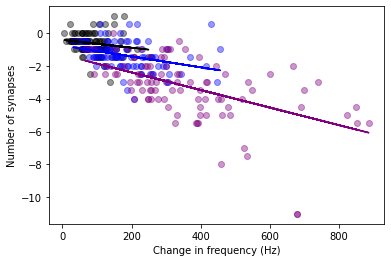

In [34]:
import numpy as np

cs = {"p0125":"black","p025": "blue","p05":"purple"}
for k in ["p0125","p025","p05"]:
    x = list()
    y = list()
    for i in os[k]:
        plt.scatter([os[k][i]["num_synapses"]],[os[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
        x.append(os[k][i]["num_synapses"])
        y.append(os[k][i]["diff_Hz"])
        if i in u:
            plt.scatter([us[k][i]["num_synapses"]],[us[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    x = np.array(x)
    #add line of best fit to plot
    plt.plot(x, a*x+b, c=cs[k])
plt.ylabel("Number of synapses")
plt.xlabel("Change in frequency (Hz)")
plt.savefig("Num_synapse_Frequency.svg")

In [61]:
%%time
e_tmps = dict()
for e in ["p0125","p025","p05"]:
    tmps = list()
    synapses = sl.experiments[f"{e}_p1"]["network_structure"].data["synapses"]
    for s in [*os[e].keys()]:
        presynaptic = np.where(synapses.T[1] == s)
        
        tmps.append(len(presynaptic[0]))
    e_tmps.update({e: tmps})      
    
        


CPU times: user 35.6 s, sys: 3.63 s, total: 39.2 s
Wall time: 39.2 s


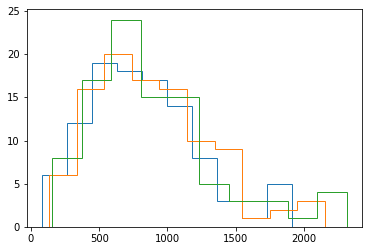

In [62]:
for e in e_tmps:
    plt.hist(e_tmps[e],histtype="step")

In [63]:
%%time
e_tmps = dict()
for e in ["p0125","p025","p05"]:
    tmps = list()
    synapses = sl.experiments[f"{e}_p1"]["network_structure"].data["synapses"]
    for s in [*os[e].keys()]:
        presynaptic = np.where(synapses.T[1] == s)
        if len(presynaptic[0]) > 1500:
            tmps.append(s)
    e_tmps.update({e: tmps})      
    
        


CPU times: user 35.4 s, sys: 3.23 s, total: 38.7 s
Wall time: 38.7 s


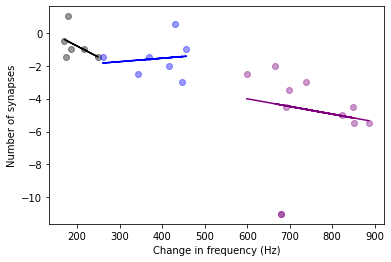

In [64]:
import numpy as np

cs = {"p0125":"black","p025": "blue","p05":"purple"}
for k in ["p0125","p025","p05"]:
    x = list()
    y = list()
    for i in os[k]:
        
        if i in e_tmps[f"{k}"]:
            plt.scatter([os[k][i]["num_synapses"]],[os[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
            x.append(os[k][i]["num_synapses"])
            y.append(os[k][i]["diff_Hz"])
            if i in u:
                plt.scatter([us[k][i]["num_synapses"]],[us[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    x = np.array(x)
    #add line of best fit to plot
    plt.plot(x, a*x+b, c=cs[k])
plt.ylabel("Number of synapses")
plt.xlabel("Change in frequency (Hz)")
plt.savefig("Num_synapse_Frequency.svg")